## Plotting with Seaborn
This file uses seaborn, pandas, and matplotlib to analyze and visualize data from gapminder.

First, get data and examine its structure.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
        
url = "https://philchodrow.github.io/PIC16A/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Next, using the gapminder data and plot time vs life expectancy with a line for each country and seperated into graphs by continent

""


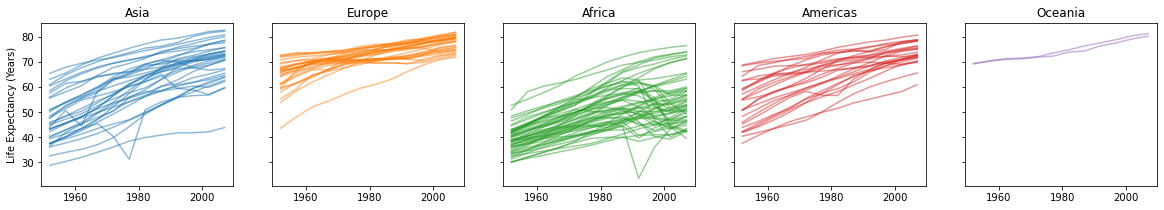

In [3]:
fig, ax=plt.subplots(1,5, figsize=(20,3), sharex=True, sharey=True)


continents={
    "Asia":0,
    "Europe":1,
    "Africa":2,
    "Americas":3,
    "Oceania":4
}

#set title for each plot using dictionary
for key in continents:
    ax[continents[key]].set_title(str(key)) 

#set y label
ax[0].set(ylabel = "Life Expectancy (Years)")
  
def plot_country(country):
    cont=country["continent"].unique() #get the corresponding continent
    #plot that country's life expectancy by year on correct continent graph
    #color chosen by color keys
    ax[continents[cont[0]]].plot(country['year'], 
                                 country["lifeExp"],
                                 alpha=.5, 
                                 color="C"+str(continents[cont[0]]))
    

#apply function to each country
gapminder.groupby(["country"]).apply(plot_country)



Next, I made more complex visualizations using seaborn

The following cell was provided as an example.

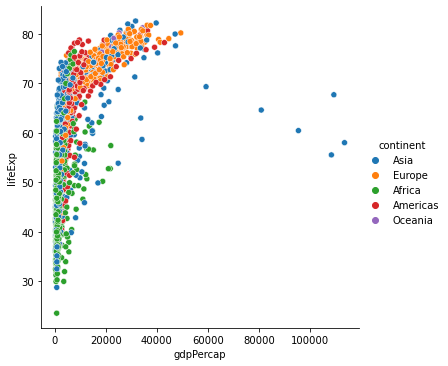

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

fgrid = sns.relplot(x = "gdpPercap", 
                    y = "lifeExp", 
                    hue = "continent", 
                    data = gapminder)

Next I created a grid of graphs, sorted by year, each graphing life expectancy by year with a point for each country, color coded by continent, and point size based on population.

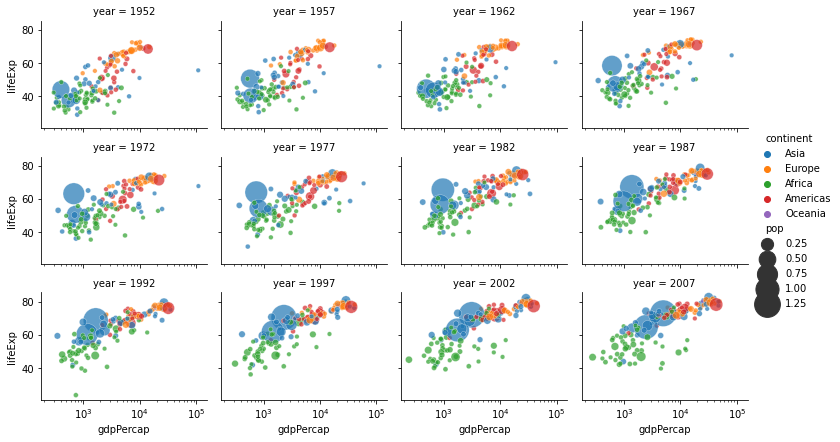

In [5]:

fgrid=sns.relplot(data=gapminder, 
                  col="year",
                  col_wrap=4,
                  x="gdpPercap", 
                  y="lifeExp", 
                  hue="continent",
                  alpha=.7,
                  height=2,
                  aspect=1.3,
                  size="pop",
                  sizes=(20,700))


#flatten converts the 2d numpy array into the 1d numpy array, 
#that way we can loop through it 
for ax in fgrid.axes.flatten():
    ax.semilogx()

Next I graphed gdp per capita graphs split by continent with a line for each country.

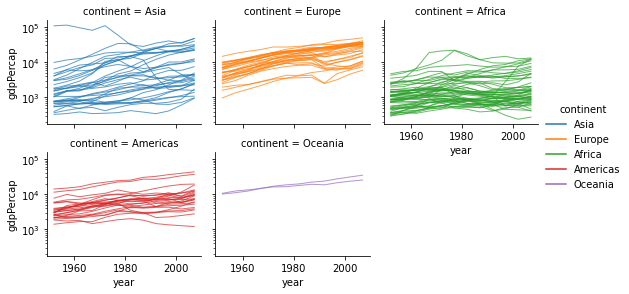

In [6]:
fgrid=sns.relplot(data=gapminder, 
                  col="continent",
                  col_wrap=3,
                  x="year", 
                  y="gdpPercap", 
                  kind="line",
                  units="country",
                  hue="continent",
                  alpha=.7,
                  height=2,
                  aspect=1.3,
                  estimator=None, 
                  lw=1)

for ax in fgrid.axes.flatten():
    ax.semilogy()

Next I ceated a bar plot split by continent, then sorted by ascending gdp per capita in 2007.

<AxesSubplot:xlabel='gdpPercap', ylabel='country'>

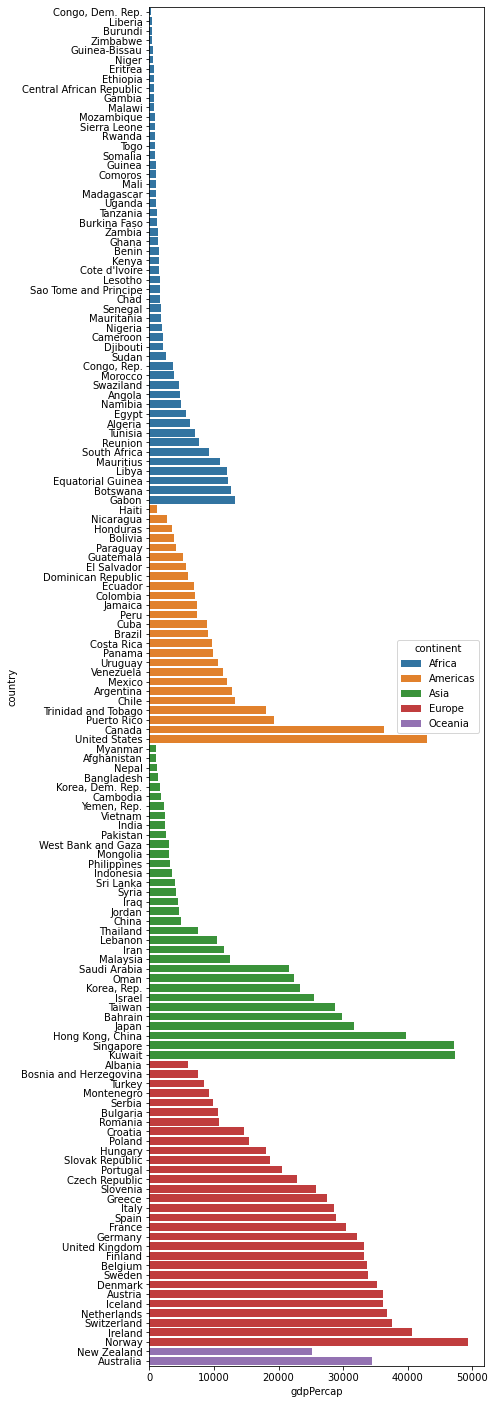

In [7]:

#choose just year 2007
bdata=gapminder[gapminder["year"]==2007]
#blank plot with specified size
fig, ax=plt.subplots(figsize=(6,25))
#sort values into contenents then by ascending  gdp
bdata=bdata.sort_values(["continent", "gdpPercap"], ascending=True)
#make barplot, label
sns.barplot(data=bdata, x="gdpPercap", y="country", hue="continent", dodge=False)

Finally, I created a bar plot of gdp per capita by continent for the year 2007.

<AxesSubplot:xlabel='gdpPercap', ylabel='continent'>

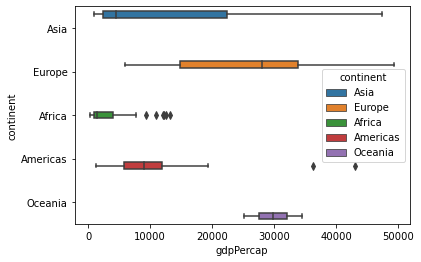

In [8]:
#use data from just 2007
bdata=gapminder[gapminder["year"]==2007]
sns.boxplot(x="gdpPercap", y="continent",
            hue="continent",
            data=bdata)


## Logistic regression by hand

Next, I made a logstic regression model to estimate the probability that an email is spam based on the proportion of flag words in the emails body text. The cell below  was given to me as a starting point.

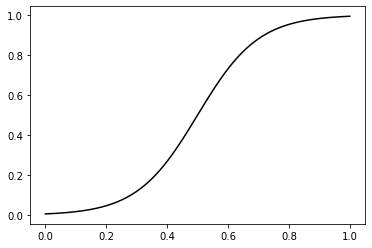

In [9]:
# run this block

import numpy as np
from matplotlib import pyplot as plt

n_points = 1000

a = 10
b = -5

x = np.sort(np.random.rand(n_points))
p = 1/(1+np.exp(-a*x - b))

fig, ax = plt.subplots(1)
ax.plot(x, p, color = "black")

The below blocks were given as well, to model this typical situation where our data is not probability that an email is spam, rather whether or not the email is spam (yes or no).We currently just have probability, so to that data, we randomly generated points in line with the given probabilities.

In [10]:
# run this block
y = 1.0*(np.random.rand(n_points) < p)

A value of 1 indicates that the email is indeed spam, while a value of 0 indicates that the email is not spam. 

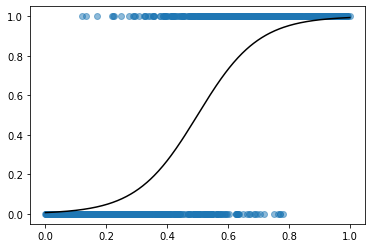

In [11]:
# run this block
ax.scatter(x, y,  alpha = 0.5)
fig

The below block is the points without the model line, because in real life, we would just have datapoints.

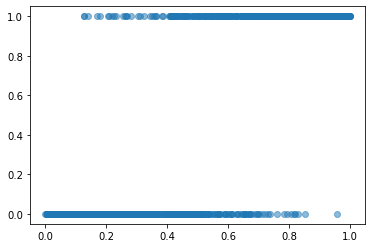

In [174]:
# run this block
fig, ax = plt.subplots(1)
ax.scatter(x, y, alpha = 0.5)

Next I will try to recover the true probabilities using logistic regression

First, a simple logistic function.

In [178]:
# your solution
def f(x,a,b):
    """
    This function puts x (data) and paramters a and b 
    into the logistic function and returns the value
    """
    return 1/(1+np.exp(-a*x - b))
    


Next, I plot 10 possible models with random values of a and b

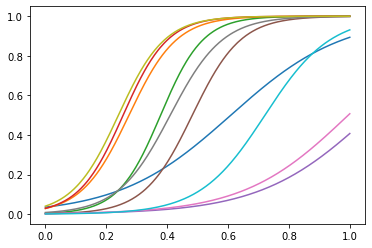

In [256]:
# your solution here

fig, ax=plt.subplots(1)
for i in range(10):
    a=np.random.uniform(5,15)
    b=np.random.uniform(-2.5, -7.5)
    ax.plot(x,f(x,a,b))
    


Next I wrote a function that computes the negative cross entropy as a function of `x`, `y`, `a`, and `b`. 

In [252]:

def nce(x,y,a,b):
    """
    Returns the negatice cross entropy for the dataset 
    using sum of negatice cross entropy for 
    each element of dataset, 
    a and b are still parameters for function f
    x is still data for function f
    y is the true/target data 
    """
    return sum(-(y* np.log(f(x,a,b))+
             (1-y)* np.log(1-f(x,a,b))))


2106.0661864957633


Next I plotted 100 models (with different random values of a and b) with the best model (lowerst negative cross entropy) highlighted in red.

9.29527830945527 -4.774450089190672


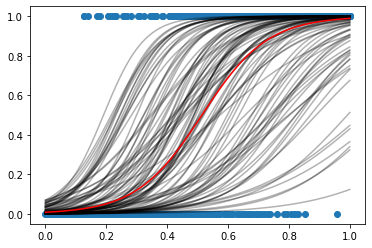

In [258]:
fig,ax=plt.subplots(1)
ax.scatter(x,y)

#make 100 lines using random data, plot them, 
best_nce=np.inf
for i in range(100):
    a=np.random.uniform(5,15)
    b=np.random.uniform(-2.5, -7.5)
    ax.plot(x,f(x,a,b), color="black", alpha=.3)
    
    preds=f(x,a,b)
    nce_=nce(x,y,a,b)
    
    #update nce to get to lowest, aka best nce
    if nce_<best_nce:
        best_nce=nce_
        best_a=a
        best_b=b

#plot best predictions as found above
best_preds=f(x,best_a,best_b)
ax.plot(x,best_preds,color="red")
#print best a and b (logistic paramters)
print(best_a, best_b)




Next, I evaluated the accuracy of the model by checking how often they correctly classify emails as spam. 

In [260]:
# your solution here
def positive_rates(x,y,best_a, best_b, c):
    """
    parameters:
    best_a and best_b,best parameters for logistic function
    x is data to make predictions, y is the true data 
    
    returns the false positive rate and true positive rate for 
    classifications of emails as spam
    """
    prediction=f(x,a,b)
    
    #the email is spam if prediction is over threshhold
    spam=prediction>c
    
    #mean of false spam classfificaiotion
    false_positive=spam[y==0].mean()
    
    #mean of true spam classficiation
    true_positive=spam[y==1].mean()
    
    return false_positive, true_positive
    
    


In [262]:
# demonstrate your function here
positive_rates(x,y,best_a, best_b, c=.25)

(0.34791252485089463, 0.9617706237424547)

Finally I plotted the reciever operating charachteristic (ROC) curve.

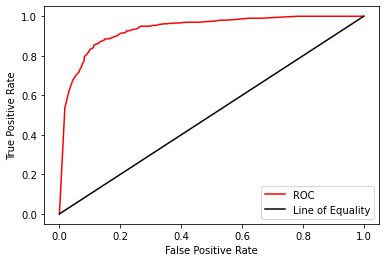

In [266]:
# plot code here

fig,ax = plt.subplots(1)
c_arr=np.linspace(0,1,100)

#initialize as empty coordinate arrays
X=[]
Y=[]

#loop through true and false positives for all c values
for cs in c_arr:
    false_positive,true_positive=positive_rates(x,y,best_a,best_b,cs)
    X.append(false_positive)
    Y.append(true_positive)

#plot roc and line of equality
plt.plot(X,Y, color="red", label="ROC")   
plt.plot([0,1], [0,1], color="black", label="Line of Equality")  

#label and legend
ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()